In [54]:
include("../../core/kinetic.jl")
using .Kinetic
using GLMakie
#using StatsBase : Histogram

LoadError: ArgumentError: Package StatsBase not found in current path.
- Run `import Pkg; Pkg.add("StatsBase")` to install the StatsBase package.

In [45]:
dat = Datapoint(N=500)

Datapoint("init", 500, 0.0, "free", "random", 0.1, 1, 0, 0, 0.0, 0, [0.11119 0.80645; 0.00038 0.73106; … ; 0.56326 0.58668; 0.68281 0.0382], [0.16681 0.38845; -0.57976 -0.69705; … ; 0.34297 -0.47292; -0.05619 1.13977])

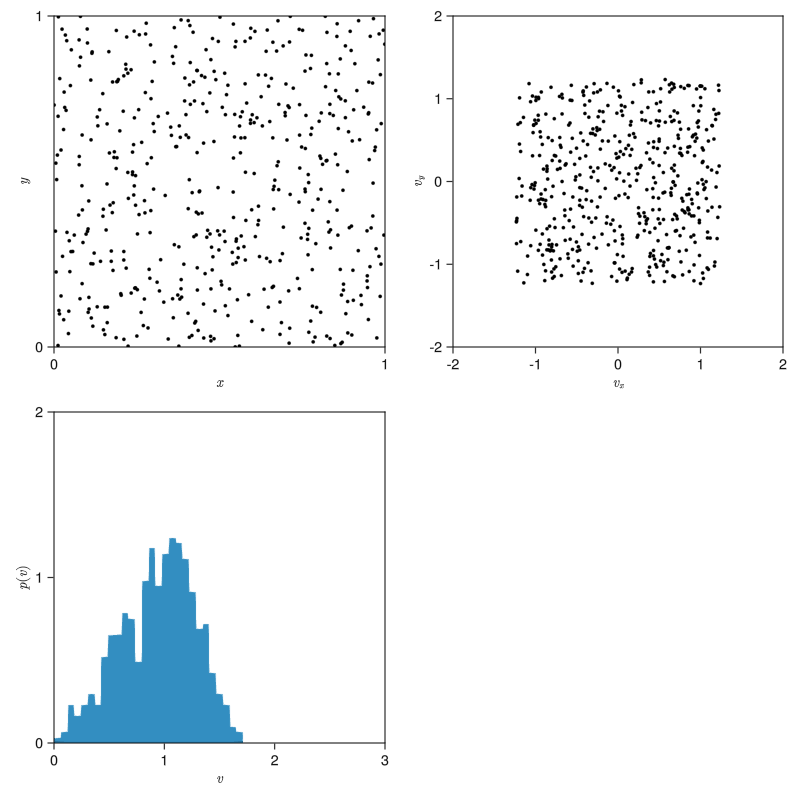

In [53]:
boxtheme = Theme(
    fontsize=14,
    palette = (color=[:black,],),
    Axis = (
        limits = (0,1,0,1),
        xticks = [0,1],
        yticks = [0,1],
        aspect = 1,
        xgridvisible = false,
        ygridvisible = false,
    ),
    Lines = (
        color = :black,
    ),
    Scatter = (
        marker = :circle,
        markersize = 5,
    ),
)

set_theme!(boxtheme)

newfig() = newfig(Datapoint())

function newfig(dat::Datapoint)
    fig = Figure(resolution = (800,800))
    Axis(fig[1,1], 
        xlabel=L"x", 
        ylabel=L"y",
    )
    Axis(fig[1,2], 
        xlabel=L"v_x", 
        ylabel=L"v_y", 
        limits=(-2,2,-2,2), 
        xticks=-2:2,
        yticks=-2:2,
    )
    Axis(fig[2,1], 
        xlabel=L"v", 
        ylabel=L"p(v)", 
        limits=(0,3,0,2), 
        xticks=0:3,
        yticks=0:2,
    )
    return fig
end

boxplot(dat::Datapoint) = boxplot(newfig(dat),dat)

function boxplot(fig::Figure, dat::Datapoint)
    ## calculate speeds
    v = sqrt.(dat.vxy[:,1].^2 + dat.vxy[:,2].^2)
    ## plot
    scatter!(fig.content[1],  dat.xy[:,1],  dat.xy[:,2])
    scatter!(fig.content[2], dat.vxy[:,1], dat.vxy[:,2])
    hist!(fig.content[3], v; bins=range(0,3,50), normalization=:pdf, fillto=0)
    ## return
    return fig
end

fig = boxplot(dat)

fig


LoadError: ArgumentError: Package StatsBase not found in current path.
- Run `import Pkg; Pkg.add("StatsBase")` to install the StatsBase package.